## Introdução à classificação

#### Aproximar ou estimar $P(y\,|\,\mathbf{x})$

Como visto na introdução, o erro de classificação pode ser minimizado escolhendo-se a classe $argmax_y \{P(y\,|\,\mathbf{x})\}$.

Uma primeira observação útil é o fato de que não precisamos, necessariamente, estimar o valor exato de $P(y\,|\,\mathbf{x})$. Precisamos, de fato, apenas de <b>funções discriminantes</b> $g_y(\mathbf{x})$ tal que, para todo $\mathbf{x} \in X$ e para todo $z \in Y, z\neq y$, $g_y(\mathbf{x}) > g_z(\mathbf{x}) \Longleftrightarrow P(y\,|\,\mathbf{x}) > P(z\,|\,\mathbf{x})$. Ou seja, basta apenas que as relações de ordem entre os valores das funções discriminantes $g_y(\mathbf{x})$, $y\in Y$, sejam consistentes com as relações entre as posterioris $P(y\,|\,\mathbf{x})$, $y\in Y$, para cada um dos elementos $\mathbf{x}\in X$.

<b>Como podemos escolher essas funções discriminantes ? Isso é possível ?</b>

A seguir apresentamos a ideias relacionadas com um método conhecido na literatura como <b>regressão logística</b>, método este utilizado para classificação binária.


<b>(Parênteses)</b> Considere a função $\displaystyle s(x) = \frac{1}{1+e^{-x}}$, $x \in \mathbb{R}$.


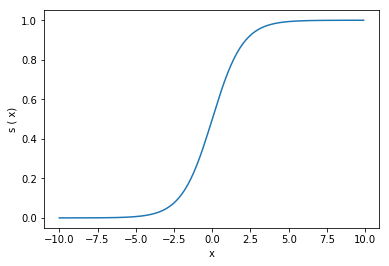

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.xlabel('x')
plt.ylabel('s ( x)')
plt.show()


Se considerarmos $\displaystyle s_a(x) = \frac{1}{1+e^{-ax}}$, $a \in \mathbb{R}$, temos uma família de funções.

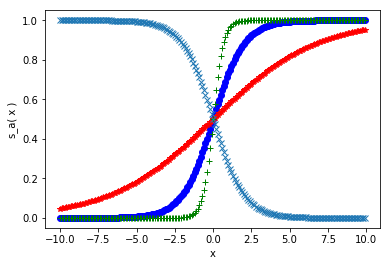

In [2]:
def s_a(a,x):
    return 1 / (1 + np.exp(-a*x))

x = np.arange(-10.0, 10.0, 0.1)
# Plot da função s_a() para três valores distintos de a
plt.plot(x, s_a(1,x), 'bo', x, s_a(0.3,x), 'r*', x, s_a(3,x), 'g+', x, s_a(-1,x), 'x')
plt.xlabel('x')
plt.ylabel('s_a( x )')
plt.show()

Note que $0\leq s_a(x) \leq 1$, não importa o valor de $a$ e de $x$. 

Vamos agora considerar $z = z(\mathbf{x}) = h_{(w_0,w_1)}(\mathbf{x}) = w_0 + w_1 \,x$ ( $\mathbf{x} = (x_1) = x \in \mathbb{R}$ ) e plotar $z(\mathbf{x}) = s(h_{(w_0,w_1)}(\mathbf{x}))$ para diferentes valores de $(w_0,w_1)$. Experimente alterar $w_0$ e $w_1$ no código abaixo:

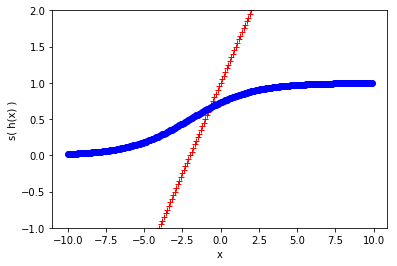

In [4]:
w_0 = 1
w_1 = 0.5

def h(w_0,w_1,x):
    return w_0 + w_1*x

x = np.arange(-10.0, 10.0, 0.1)
plt.plot(x, h(w_0,w_1,x), 'r+', x, s_a(1,h(w_0,w_1,x)), 'bo')
plt.xlabel('x')
plt.ylabel('s( h(x) )')
plt.ylim([-1,2])
plt.show()

O que $s(z)$ tem a ver com as probabilidades $P(y\,|\,\mathbf{x})$ ?

Se tomarmos
$$
g_0(z) = \frac{1}{1+e^{z}}
$$
e
$$
g_1(z) = \frac{e^{z}}{1+e^{z}}
$$
temos $g_0(z) + g_1(z) = 1$. Assim, para o caso de classificação binária (i.e.,$Y=\{0,1\}$), podemos considerar

$$P(y=0\,|\,\mathbf{x}) = g_0(z(\mathbf{x}))$$

$$P(y=1\,|\,\mathbf{x}) = g_1(z(\mathbf{x}))$$

com 
$$z = z(\mathbf{x}) = h_{(w_0,w_1)}(\mathbf{x}) = w_0 + w_1x\,.$$
Isto é, fazemos $P(y\,|\,\mathbf{x})$ depender de uma função linear $h_{(w_0,w_1)}(\mathbf{x}) = w_0 + w_1x$. 


Agora, dado um conjunto de observações $\{ (\mathbf{x}_i,y_i): i = 1,\ldots, N \}$, gostaríamos de saber qual é a distribuição que mais se aproxima da distribuição que deu origem a essas observações. Como estamos supondo que as distribuções são da forma $P(y=0\,|\,\mathbf{x}) = \frac{1}{1+e^{w_0 + w_1x}}$ e $P(y=1\,|\,\mathbf{x}) = 1 - P(y=0\,|\,\mathbf{x})$, o que queremos de fato é determinar o valor dos parâmetros $(w_0,w_1)$ que definem a distribuição. Ora, levando-se em conta que as amostras $\{ (\mathbf{x}_i,y_i): i = 1,\ldots, N \}$ foram de fato observadas, uma boa escolha para os parâmetros $(w_0,w_1)$ seriam os valores que maximizam a probabilidade de $\{ (\mathbf{x}_i,y_i): i = 1,\ldots, N \}$ ser observado. 

Supondo que a observação de um dado par $(\mathbf{x}_i,y_i)$ é independente da observação de qualquer outro par, podemos escrever a probabilidade de se observar essas amostras como:
$$
L(w_0,w_1) = \prod_{i=1}^{N} P(y_i\,|\,\mathbf{x}_i,w_0,w_1)
$$
Note que a probabilidade a posteriori é expressa também em função dos parâmetros $(w_0,w_1)$.
Além disso, observe que 
$$
P(y\,|\,\mathbf{x},w_0,w_1) = [g_0(z(\mathbf{x}))]^{(1-y)}[g_1(z(\mathbf{x}))]^{y}
$$

Portanto, podemos escrever:
$$
L(w_0,w_1) = \prod_{i=1}^{N} [g_0(z(\mathbf{x}_i))]^{(1-y_i)}[g_1(z(\mathbf{x}_i))]^{y_i}
$$

O que gostaríamos de calcular são os parâmetros $(w_0,w_1)$ que maximizam $L(w_0,w_1)$ (isto é, conferem maior verossimilhança ao fato das amostras $\{ (\mathbf{x}_i,y_i): i = 1,\ldots, N \}$ terem sido observadas).

Em vez de maximizar $L$, podemos maximizar $\ln\,L$ já que a aplicação de uma função monótona (no caso a função $\ln$) não altera a relação de ordem entre os valores em dois pontos da função. Isto é, podemos considerar o problema equivalente de encontrar o ponto de máximo da função 
$$
l(w_0,w_1) = \ln\, L(w_0,w_1)
$$

Note que 
$$
l(w_0,w_1) = \sum_{i=1}^{N} [ ]
$$

<font color="red"> Falta preencher um pedaço aqui ...</font>
O ponto de máximo dessa função pode ser obtida calculando-se o ponto de mínimo da função negativa. Uma técnica que pode ser usada para tal cálculo é a técnica do gradiente descendente.

### Fronteira de decisão

Como estamos tratando um caso binário, e queremos comparar a relação de ordem entre $g_0(\mathbf{x})$ e $g_1(\mathbf{x})$, podemos definir
$$
g(\mathbf{x}) = g_1(\mathbf{x}) - g_0(\mathbf{x})
$$
e considerar que $\mathbf{x}$ é da classe $0$ se $g(\mathbf{x}) < 0$ e que $\mathbf{x}$ é da classe $1$ se $g(\mathbf{x}) > 0$.

Note, adicionalmente, que se considerarmos $\tilde{g}_0(\mathbf{x}) = \ln g_0(\mathbf{x})$ e $\tilde{g}_1(\mathbf{x}) = \ln g_1(\mathbf{x})$, como a função $\ln$ é monótona, a ordem relativa não é alterada. Ou seja, temos que  $g_1(\mathbf{x}) - g_0(\mathbf{x}) > 0 \Longleftrightarrow \tilde{g}_1(\mathbf{x}) - \tilde{g}_0(\mathbf{x}) > 0$. 
Mas,
$$
\tilde{g}_1(\mathbf{x}) - \tilde{g}_0(\mathbf{x}) = \ln \frac{g_1(\mathbf{x})}{g_0(\mathbf{x})} = \frac{\frac{z}{1+z}}{\frac{1}{1+z}} = \ln z = w_0 + w_1 x
$$

Logo, verificar se $g(\mathbf{x}) > 0$ é equivalente a verificar se $w_0 + w_1 x > 0$. Ou seja, a fronteira que as amostras da classe $0$ das amostras da classe $1$ é uma reta (um função linear).

<div style="float: left;">Voltar para o <a href="../html/main.html">menu principal</a></div>
<div style="float: right;">Ir para: <a href="../html/practice_classification.html">Prática -- classificação</a></div>